<a href="https://colab.research.google.com/github/ektamistry/Computer-Vision/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# read the original image
img = cv2.imread('/content/cameraman.tif',0)

In [ ]:
#size of orignal img
[x,y] = img.shape
print(x,y)

512 512


In [ ]:
# Image Negative
img_negative = (255-img)
img_negative

array([[ 99,  98,  95, ..., 103, 103, 103],
       [ 99,  98,  96, ..., 103, 103, 103],
       [ 97,  98,  99, ..., 103, 103, 103],
       ...,
       [134, 132, 129, ..., 134, 142, 144],
       [134, 132, 129, ..., 134, 142, 144],
       [134, 132, 129, ..., 134, 142, 144]], dtype=uint8)

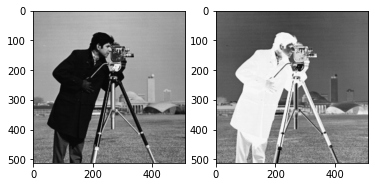

In [ ]:
# orignal img
plt.subplot(1,2,1)
plt.imshow(img , cmap = 'gray')
# Negative img
plt.subplot(1,2,2)
plt.imshow(img_negative , cmap = 'gray')

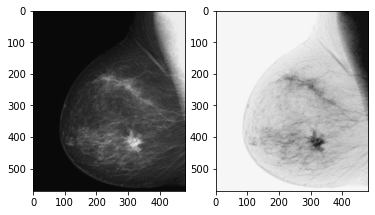

In [ ]:
img1  = cv2.imread('/content/Fig0304(a)(mamogram_digital_Xray).tif',0)
img1_negative = (255-img1)
# orignal img
plt.subplot(1,2,1)
plt.imshow(img1 , cmap = 'gray')
# Negative img
plt.subplot(1,2,2)
plt.imshow(img1_negative , cmap = 'gray')

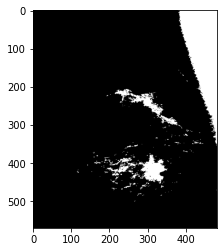

In [ ]:
#Thresholding using list comprehension
#img = np.where(img3> (150,255))
img2 = cv2.imread('/content/Fig0304(a)(mamogram_digital_Xray).tif',0)
m,n = img2.shape
img2_thre =[0 if img2[i,j] < 115 else 255 for i in range(0,m) for j in range(0,n) ]
img2_thre = np.reshape(img2_thre , (m,n))
plt.imshow(img2_thre , cmap = 'gray')

enter min100
enter max200


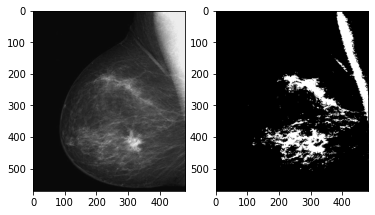

In [ ]:
# Grey Level slicing without background
# s= L-1 for a < r < b, here a and b define some specific range of grey level
# s= 0 otherwise.
img = cv2.imread('/content/Fig0304(a)(mamogram_digital_Xray).tif',0)
m,n = img.shape
a = int(input("enter min"))
b = int(input("enter max"))
img_new = np.zeros((m,n) , dtype = int)
for i in range(m):
  for j in range(n):
    r = img[i][j]
    if r>a and r<b:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0

# orignal img
plt.subplot(1,2,1)
plt.imshow(img , cmap = 'gray')
# sliced img without background
plt.subplot(1,2,2)
plt.imshow(img_new , cmap = 'gray')

enter min100
enter max200


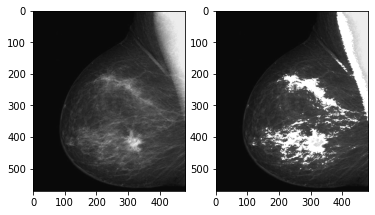

In [ ]:
# Grey level slicing with background
# s= L-1 for a < r < b, here a and b define some specific range of grey level
#s= r otherwise.
img = cv2.imread('/content/Fig0304(a)(mamogram_digital_Xray).tif',0)
m,n = img.shape
a = int(input("enter min"))
b = int(input("enter max"))
img_new = np.zeros((m,n) , dtype = int)
for i in range(m):
  for j in range(n):
    r = img[i][j]
    if r>a and r<b:
      img_new[i,j] = 255
    else:
      img_new[i,j] = r

# orignal img
plt.subplot(1,2,1)
plt.imshow(img , cmap = 'gray')
# sliced img without background
plt.subplot(1,2,2)
plt.imshow(img_new , cmap = 'gray')

In [ ]:
# spatial domain
# #Low Pass SPatial Domain Filtering to observe the blurring effect
#Read the image
img= cv2.imread('/content/img 1.png',0)
m,n=img.shape

In [ ]:
# Low pass spatial domain Filtering to observe the blurring effect
# Develop averaging filter(3,3) mask
mask = np.ones([3,3], dtype = int)
print(mask)
mask = mask/9
print(mask)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


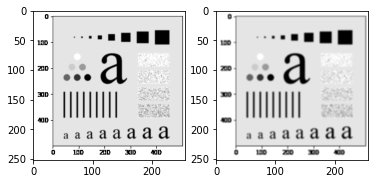

In [ ]:
# convolve /correlation the 3X3 mask over the img
img_new=img.copy()
for i in range(1,m-1):
    for j in range(1,n-1):
        temp= img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]

        img_new[i,j]=temp

#img_new=img_new.astype(np.uint8)
cv2.imwrite('Blurred.png',img_new)

# orignal img
plt.subplot(1,2,1)
plt.imshow(img , cmap = 'gray' )
# sliced img without background
plt.subplot(1,2,2)
plt.imshow(img_new, cmap="gray", vmin=0, vmax=255)

Enter size of the mask: 15


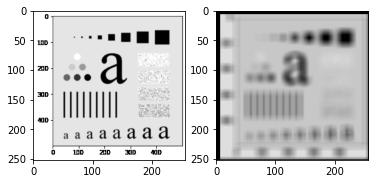

In [ ]:
# Spatial domain low pass filtering for a variable size mask- Generalized program
img_gen= np.zeros([m,n], dtype=int)
b= int(input("Enter size of the mask: "))
a=b//2

for i in range(1,m-1):
    for j in range(1,n-1):
        temp= img[i-a:i+a,j-a:j+a]
        constant= np.sum(temp)
        img_gen[i,j]= constant//b**2

# orignal img
plt.subplot(1,2,1)
plt.imshow(img , cmap = 'gray' )
# filtered img
plt.subplot(1,2,2)
plt.imshow(img_gen, cmap="gray")

In [ ]:
# median filtering on the img with salt and pepper noise
img = cv2.imread("/content/img2.jpg" , 0)
m,n = img.shape

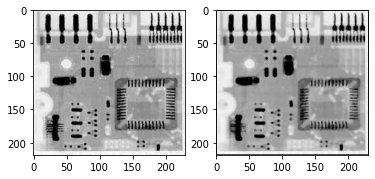

In [ ]:
# meadian filtering with 3X3 mask over the img
img_median = np.zeros([m,n])
for i in range(1,m-1):
  for j in range(1,n-1):
    temp = [img[i-1,j-1] , img[i-1,j],
            img[i-1,j+1] , img[i,j-1],
            img[i,j]     , img[i,j+1],
            img[i+1,j-1] , img[i+1,j],
            img[i+1,j+1]             ]
    img_median[i,j] = np.median(temp)

# orignal img
plt.subplot(1,2,1)
plt.imshow(img , cmap = 'gray' )
# filtered img
plt.subplot(1,2,2)
plt.imshow(img_median, cmap="gray")

Enter size of the mask: 3


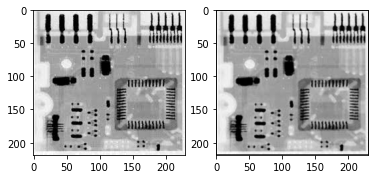

In [ ]:
# Median filtering for a variable size mask- Generalized program
img_gen = np.zeros([m,n], dtype=int)
b= int(input("Enter size of the mask: "))
a=b//2
for i in range(1,m-1):
    for j in range(1,n-1):
      temp=[]
      temp= img[i-a:i+a,j-a:j+a]
      img_gen[i,j]= np.median(temp)

# orignal img
plt.subplot(1,2,1)
plt.imshow(img , cmap = 'gray' )
# filtered img
plt.subplot(1,2,2)
plt.imshow(img_gen, cmap="gray")